### Name: Hunter Busick
### PID: 730563704

# Exercise 1
## Excercise 1, a)

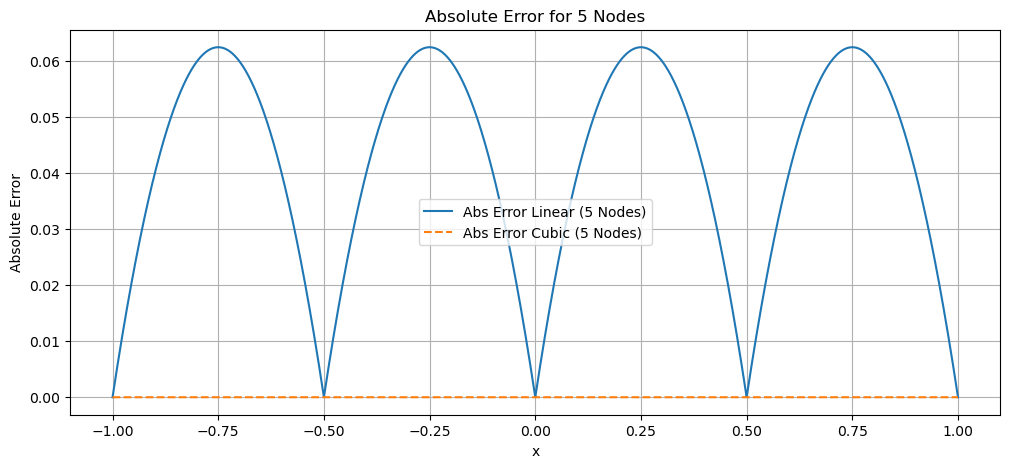

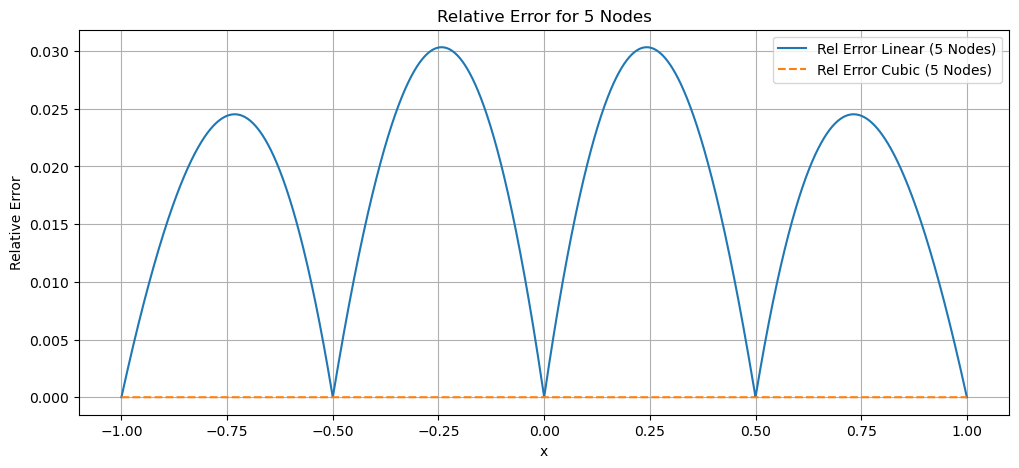

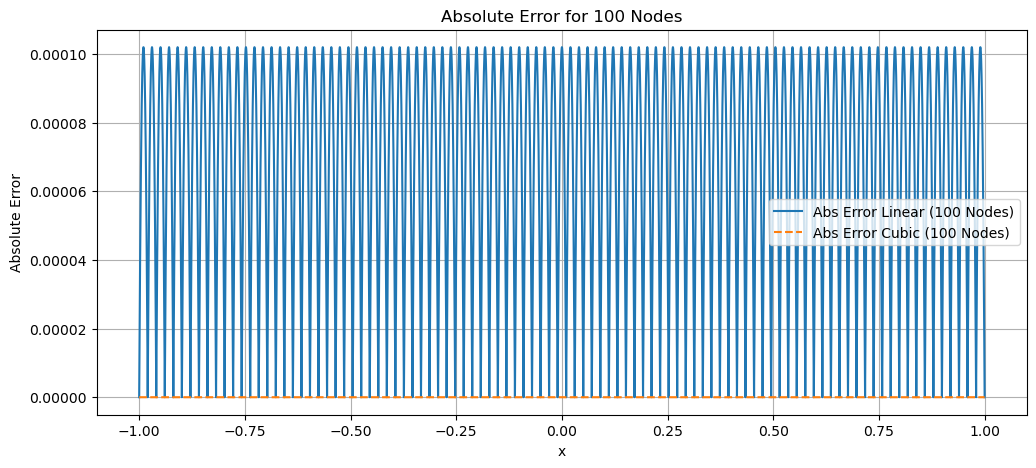

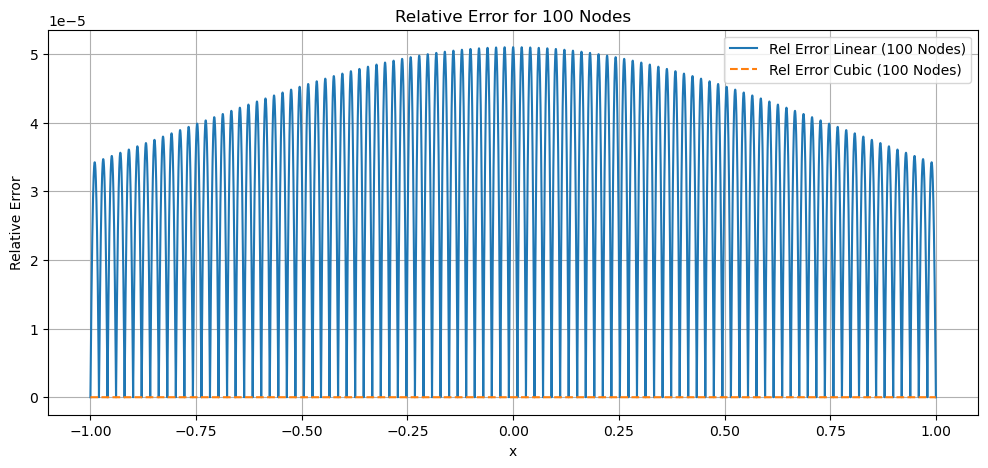

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

# Define the true function we're trying to approximate
# f(x) = 2 + x^2 is smooth, continuous, and ideal for testing interpolation accuracy
def f(x):
    return 2 + x**2

# Create a very fine grid of 10,000 points in [-1, 1]
# This is our "ground truth" evaluation grid to compare interpolation errors
x_fine = np.linspace(-1, 1, 10000)

# Create two sets of interpolation nodes:
# One coarse grid with only 5 equally spaced points
x5 = np.linspace(-1, 1, 5)
# One dense grid with 100 equally spaced points
x100 = np.linspace(-1, 1, 100)

# Evaluate the true function at the interpolation nodes
# These are the "known" values the interpolators will use
y5 = f(x5)
y100 = f(x100)

def interpolate_and_plot(x_nodes, y_nodes, label_suffix):
    """
    Given a set of interpolation nodes and their function values,
    perform both linear and cubic spline interpolation.
    Then compute and plot both absolute and relative errors
    compared to the true function on a dense grid.
    """
    
    # Perform piecewise linear interpolation (connect the dots)
    linear_interp = interp1d(x_nodes, y_nodes, kind='linear', fill_value='extrapolate')
    y_linear = linear_interp(x_fine)

    # Perform cubic spline interpolation (smooth, curve-fitting)
    cubic_interp = CubicSpline(x_nodes, y_nodes)
    y_cubic = cubic_interp(x_fine)

    # Evaluate the true function values on the fine grid
    true_values = f(x_fine)

    # Calculate absolute errors for both methods
    abs_error_linear = np.abs(y_linear - true_values)
    abs_error_cubic = np.abs(y_cubic - true_values)

    # Calculate relative errors (to scale the error by the size of true values)
    rel_error_linear = abs_error_linear / np.abs(true_values)
    rel_error_cubic = abs_error_cubic / np.abs(true_values)

    # Plot absolute error
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, abs_error_linear, label=f'Abs Error Linear ({label_suffix})')
    plt.plot(x_fine, abs_error_cubic, label=f'Abs Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.title(f'Absolute Error for {label_suffix}')
    plt.grid(True)
    plt.show()

    # Plot relative error
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, rel_error_linear, label=f'Rel Error Linear ({label_suffix})')
    plt.plot(x_fine, rel_error_cubic, label=f'Rel Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.title(f'Relative Error for {label_suffix}')
    plt.grid(True)
    plt.show()

# Run the interpolation and error plots for both coarse and dense node cases

# First: Only 5 interpolation points — this is a poor approximation, especially for nonlinear functions
interpolate_and_plot(x5, y5, '5 Nodes')

# Then: 100 interpolation points — should result in very small errors, especially for the cubic spline
interpolate_and_plot(x100, y100, '100 Nodes')


## Excercise 1, b)

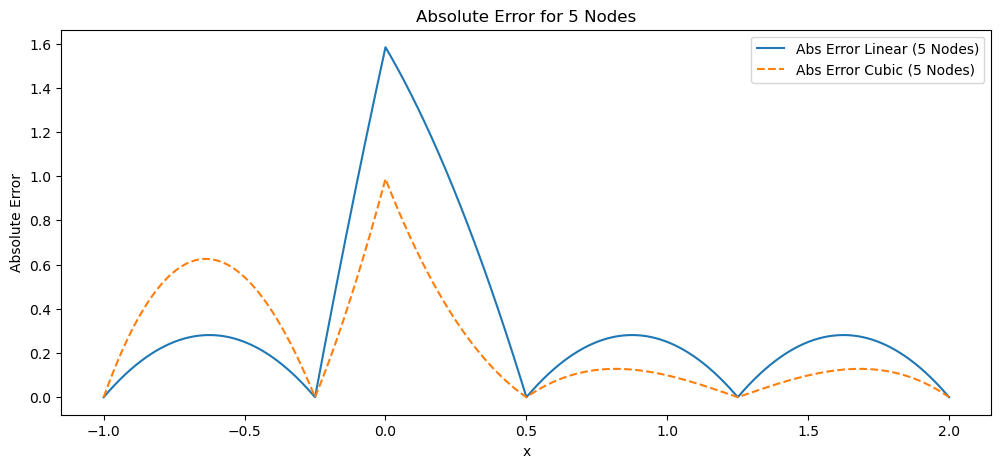

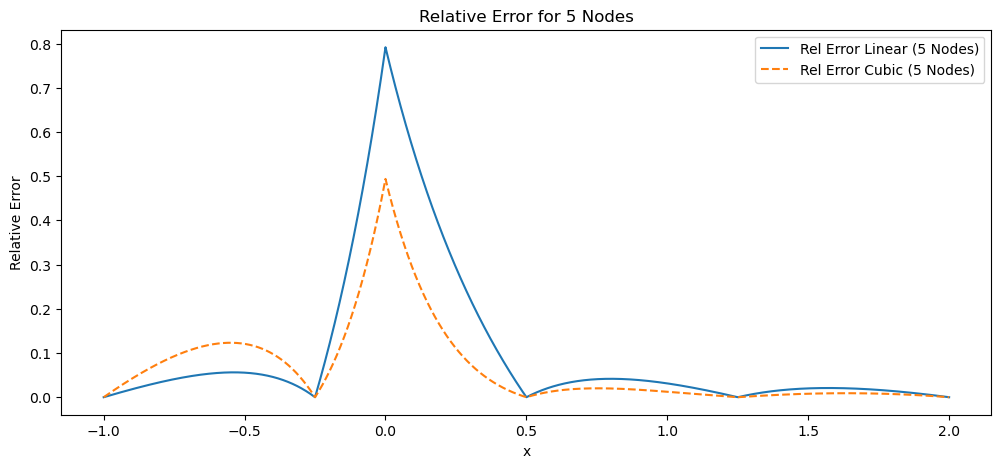

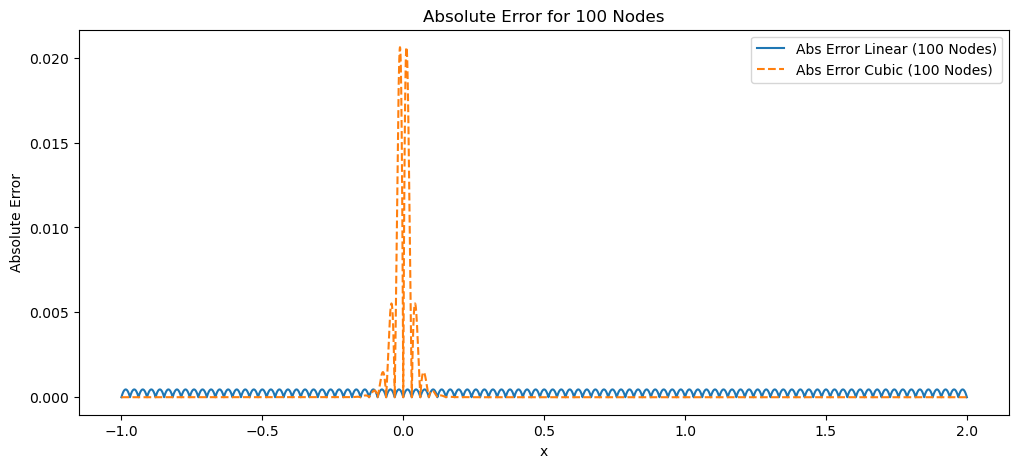

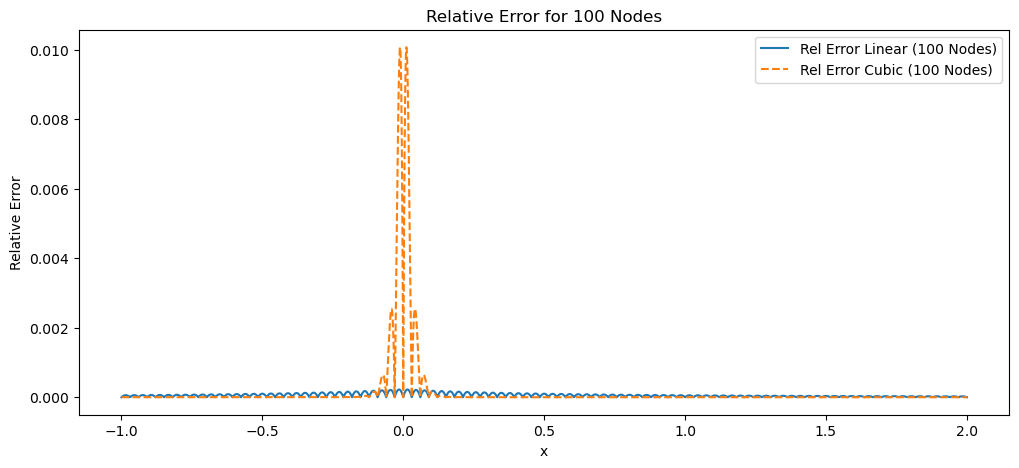

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline


# Define function f(x) for Exercise 1b
def f(x):
    return 2 + 2*x**2 + np.abs(4*x)

# Define x range
x_fine = np.linspace(-1, 2, 10000)  # Fine grid for error analysis

# Define interpolation nodes
x5 = np.linspace(-1, 2, 5)  # 5 points
x100 = np.linspace(-1, 2, 100)  # 100 points

y5 = f(x5)
y100 = f(x100)

def interpolate_and_plot(x_nodes, y_nodes, label_suffix):
    """Interpolates using linear and cubic methods, then computes and plots errors."""
    
    # Linear interpolation
    linear_interp = interp1d(x_nodes, y_nodes, kind='linear', fill_value='extrapolate')
    y_linear = linear_interp(x_fine)
    
    # Cubic spline interpolation
    cubic_interp = CubicSpline(x_nodes, y_nodes)
    y_cubic = cubic_interp(x_fine)
    
    # Compute errors
    true_values = f(x_fine)
    abs_error_linear = np.abs(y_linear - true_values)
    abs_error_cubic = np.abs(y_cubic - true_values)
    rel_error_linear = abs_error_linear / np.abs(true_values)
    rel_error_cubic = abs_error_cubic / np.abs(true_values)
    
    # Plot errors
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, abs_error_linear, label=f'Abs Error Linear ({label_suffix})')
    plt.plot(x_fine, abs_error_cubic, label=f'Abs Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.legend()
    plt.title(f'Absolute Error for {label_suffix}')
    plt.show()
    
    plt.figure(figsize=(12, 5))
    plt.plot(x_fine, rel_error_linear, label=f'Rel Error Linear ({label_suffix})')
    plt.plot(x_fine, rel_error_cubic, label=f'Rel Error Cubic ({label_suffix})', linestyle='dashed')
    plt.xlabel('x')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.title(f'Relative Error for {label_suffix}')
    plt.show()

# Perform interpolation and plotting
interpolate_and_plot(x5, y5, '5 Nodes')
interpolate_and_plot(x100, y100, '100 Nodes')


# Exercise 2
## Excercise 2, a)


In [16]:
import numpy as np

# Given parameter values
beta = 0.92      # Patience factor
alpha = 0.33     # Capital share in production
delta = 0.10     # Depreciation rate
gamma = 2        # Relative risk aversion
phi = 0.05       # Capital adjustment cost

# Compute steady state capital using the given formula
K_ss = ((1/beta + delta - 1) / alpha) ** (1 / (alpha - 1))

print(f"Steady State Capital (K_ss): {K_ss:.4f}")


Steady State Capital (K_ss): 2.3352


## Exercise 2, b)

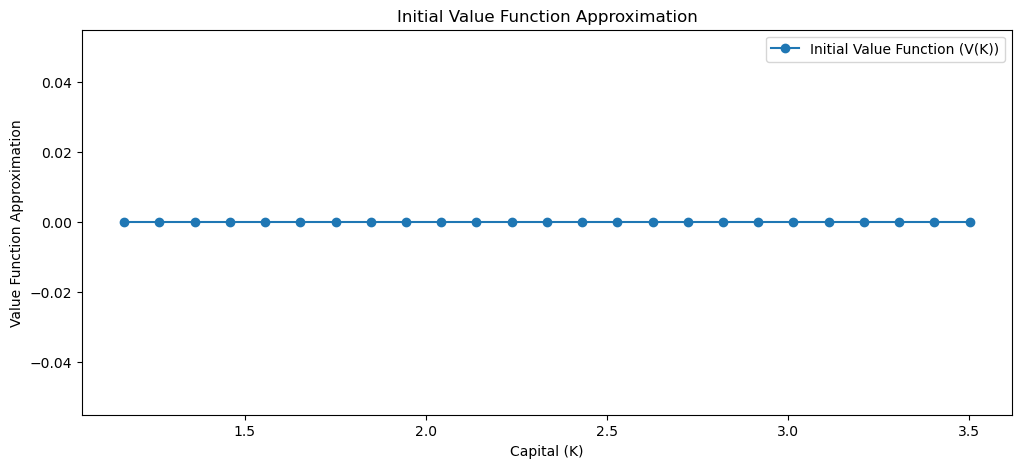

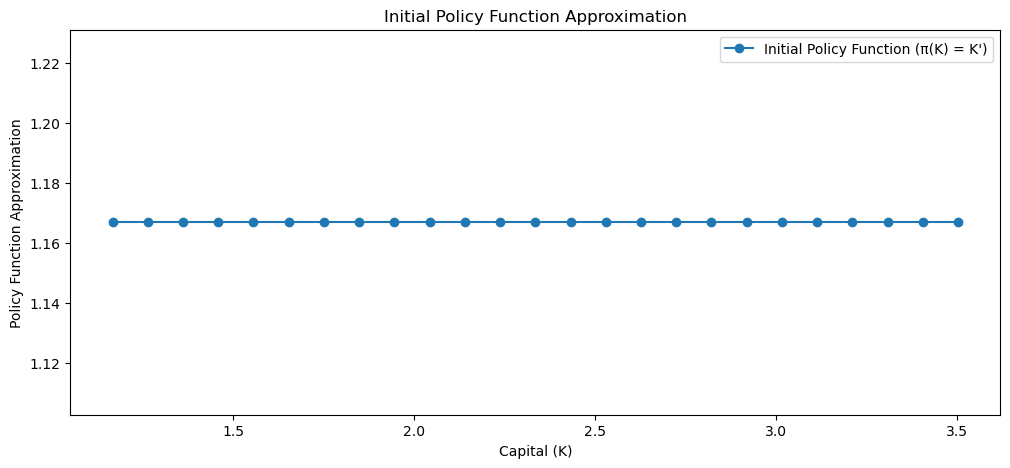

In [17]:

# Define parameters
K_min, K_max = 1.167, 3.502  # Given capital range
num_nodes = 25  # Number of interpolation nodes

# Create the grid for K
Kgrid = np.linspace(K_min, K_max, num_nodes)

# Initialize the value function approximation (start with zero)
V_approx = np.zeros_like(Kgrid)

# Initialize the policy function (always predict K' = 1.167 initially)
policy_approx = np.full_like(Kgrid, K_min)

# Create cubic spline interpolators
V_spline = CubicSpline(Kgrid, V_approx)  # Initial cubic spline for value function
policy_spline = CubicSpline(Kgrid, policy_approx)  # Initial cubic spline for policy function

# Plot the initial approximations
plt.figure(figsize=(12, 5))
plt.plot(Kgrid, V_approx, 'o-', label="Initial Value Function (V(K))")
plt.xlabel("Capital (K)")
plt.ylabel("Value Function Approximation")
plt.legend()
plt.title("Initial Value Function Approximation")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(Kgrid, policy_approx, 'o-', label="Initial Policy Function (π(K) = K')")
plt.xlabel("Capital (K)")
plt.ylabel("Policy Function Approximation")
plt.legend()
plt.title("Initial Policy Function Approximation")
plt.show()


## Exercise 2 c)

In [18]:
from scipy.optimize import minimize

def utility(C, gamma):
    """
    Computes CRRA (Constant Relative Risk Aversion) utility.
    
    Parameters:
        C : float
            Consumption level.
        gamma : float
            Coefficient of relative risk aversion.
    
    Returns:
        float
            Utility value associated with consumption C.
            Returns -inf if consumption is non-positive (to penalize infeasible choices).
    """
    
    # If consumption is non-positive, utility is undefined in economic models.
    # We return negative infinity to ensure these choices are never selected during optimization.
    if C <= 0:
        return -np.inf
    
    # Special case: if gamma = 1, use logarithmic utility instead of the general CRRA formula.
    # This avoids division by zero and reflects the fact that log utility is the limit as gamma → 1.
    if gamma == 1:
        return np.log(C)
    
    # General CRRA utility formula: u(C) = C^(1 - gamma) / (1 - gamma)
    return (C**(1 - gamma)) / (1 - gamma)


def get_update(K, V_approx_old, alpha, beta, delta, gamma, phi, Kgrid):
    """
    Perform a Bellman update for a single value of capital K.
    
    Parameters:
        K : float
            Current capital level.
        V_approx_old : CubicSpline
            Previous approximation of the value function.
        alpha, beta, delta, gamma, phi : floats
            Model parameters.
        Kgrid : np.array
            Grid of capital values used for interpolation.
    
    Returns:
        Tuple (V_new_K, K_prime_star)
            Updated value at K and optimal choice of K'
    """
    
    # Objective function: negative Bellman RHS (since we minimize)
    def objective(K_prime):
        C = K**alpha + (1 - delta) * K - K_prime - phi * (K_prime - K)**2
        u = utility(C, gamma)
        if u == -np.inf:
            return 1e10  # Penalize invalid choices
        V_future = V_approx_old(K_prime)
        return -(u + beta * V_future)

    # Bounds and initial guess
    bounds = [(Kgrid[0], Kgrid[-1])]
    initial_guess = max((1 - delta) * K, Kgrid[0])

    # Optimization
    result = minimize(objective, x0=initial_guess, bounds=bounds, method='Nelder-Mead')

    # Extract results
    K_prime_star = result.x[0]
    V_new_K = -result.fun

    return V_new_K, K_prime_star


## Exercise 2, d)

In [19]:
def update_V(Kgrid, V_approx_old, alpha, beta, delta, gamma, phi):
    """
    Perform a full Bellman update over all capital levels in Kgrid.
    
    Returns:
        V_new_spline : CubicSpline for updated value function
        policy_spline : CubicSpline for updated policy function
    """
    V_new_vals = np.empty_like(Kgrid)
    policy_vals = np.empty_like(Kgrid)
    
    for i, K in enumerate(Kgrid):
        V_new_vals[i], policy_vals[i] = get_update(K, V_approx_old, alpha, beta, delta, gamma, phi, Kgrid)
    
    # Create updated spline interpolators
    V_new_spline = CubicSpline(Kgrid, V_new_vals)
    policy_spline = CubicSpline(Kgrid, policy_vals)

    return V_new_spline, policy_spline


## Exercise 2, e)

In [20]:
def converge_Bellman(Kgrid, alpha, beta, delta, gamma, phi, maxiter=1000, tol=1e-9):
    """
    Iteratively update the value and policy functions until convergence.
    
    Returns:
        V_final : CubicSpline (value function)
        policy_final : CubicSpline (policy function)
        converged : bool
    """
    # Initialize value function: V(K) = 0
    V_approx_old = CubicSpline(Kgrid, np.zeros_like(Kgrid))

    for iteration in range(maxiter):
        # Bellman update
        V_new_spline, policy_spline = update_V(Kgrid, V_approx_old, alpha, beta, delta, gamma, phi)

        # Evaluate old and new V at grid points
        V_old_vals = V_approx_old(Kgrid)
        V_new_vals = V_new_spline(Kgrid)

        # Check for convergence
        diff = np.max(np.abs(V_new_vals - V_old_vals))
        if diff < tol:
            return V_new_spline, policy_spline, True

        # Update for next iteration
        V_approx_old = V_new_spline

    # If not converged
    return V_new_spline, policy_spline, False


## Exercise 2, f)

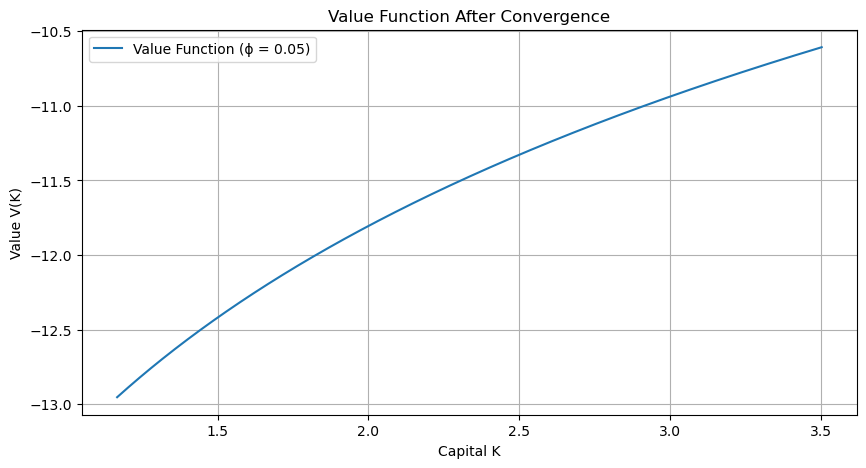

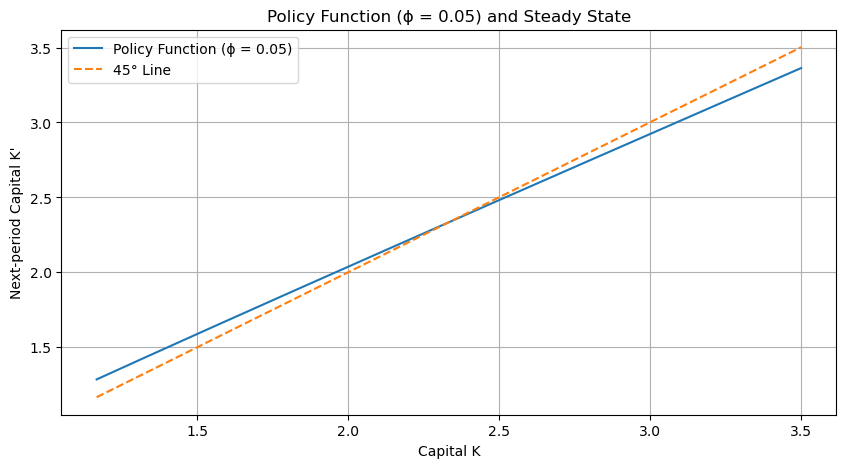

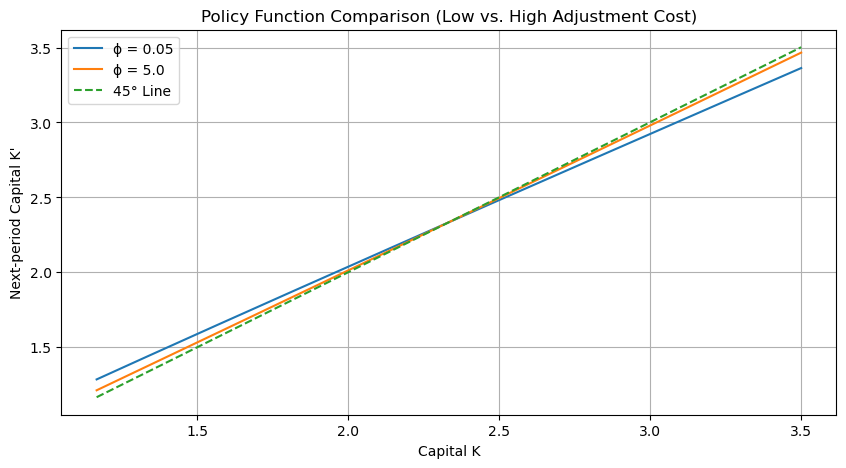

In [21]:
import matplotlib.pyplot as plt

# Set parameters
alpha = 0.33
beta = 0.92
delta = 0.10
gamma = 2
Kgrid = np.linspace(1.167, 3.502, 25)

# Run for phi = 0.05
phi_low = 0.05
V_low, policy_low, conv_low = converge_Bellman(Kgrid, alpha, beta, delta, gamma, phi_low)

# Run for phi = 5.0
phi_high = 5.0
V_high, policy_high, conv_high = converge_Bellman(Kgrid, alpha, beta, delta, gamma, phi_high)

# Evaluate splines for plotting
K_dense = np.linspace(Kgrid[0], Kgrid[-1], 500)
V_vals_low = V_low(K_dense)
policy_vals_low = policy_low(K_dense)
V_vals_high = V_high(K_dense)
policy_vals_high = policy_high(K_dense)

# Plot Value Function (low phi)
plt.figure(figsize=(10, 5))
plt.plot(K_dense, V_vals_low, label="Value Function (ϕ = 0.05)")
plt.xlabel("Capital K")
plt.ylabel("Value V(K)")
plt.title("Value Function After Convergence")
plt.legend()
plt.grid(True)
plt.show()

# Plot Policy Function (ϕ = 0.05) + 45° line
plt.figure(figsize=(10, 5))
plt.plot(K_dense, policy_vals_low, label="Policy Function (ϕ = 0.05)")
plt.plot(K_dense, K_dense, '--', label="45° Line")
plt.xlabel("Capital K")
plt.ylabel("Next-period Capital K'")
plt.title("Policy Function (ϕ = 0.05) and Steady State")
plt.legend()
plt.grid(True)
plt.show()

# Plot comparison of policy functions for ϕ = 0.05 vs 5.0
plt.figure(figsize=(10, 5))
plt.plot(K_dense, policy_vals_low, label="ϕ = 0.05")
plt.plot(K_dense, policy_vals_high, label="ϕ = 5.0")
plt.plot(K_dense, K_dense, '--', label="45° Line")
plt.xlabel("Capital K")
plt.ylabel("Next-period Capital K'")
plt.title("Policy Function Comparison (Low vs. High Adjustment Cost)")
plt.legend()
plt.grid(True)
plt.show()


We see that the orange curve lies closer to the 45 degree line than the blue curve indicating that the agent chooses smaller changes in the next period capital. This policy is more conservatie, and indicates that higher adjustment costs discourage large changes in investment strategy. With lower adjustment costs we see capital adjusts quicker to the steady state. Capital adjusts more smooth and takes longer to converge.



